# Questão 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Funções

In [21]:
def f(x):
    return x**3 - 6*x**2 + 11*x - 6

In [22]:
def Method_secante(x0, x1, tol=1e-6, max_iter=100):
    for i in range(max_iter):
        f_x0 = f(x0)
        f_x1 = f(x1)
        
        if abs(f_x1 - f_x0) < tol:
            return x1  #converge para uma solução aceitável
        
        x_next = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        x0, x1 = x1, x_next
        
    raise Exception("O método da secante não convergiu após o número máximo de iterações.")

#Condições iniciais
x0 = 1
x1 = 2
tol = 1e-6

In [23]:
raiz = Method_secante(x0, x1)
print(f"A raiz encontrada pelo Método da Secante é: {raiz}")

A raiz encontrada pelo Método da Secante é: 2


# Método de Newton

Como visto em aula e também em [unicamp](https://www.ime.unicamp.br/~sussner/Aula_NR_Sec.pdf):
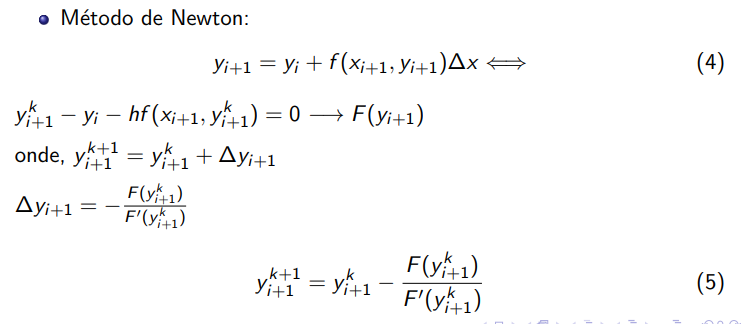

In [43]:
def f(x, y):
    return x**3 - 6*x**2 + 11*x - 6

def df(x, y):
    return 3*x**2 - 12*x + 11

In [66]:
def calcular_prox_valor(a, b, N, y0, x):
    y = np.zeros(N)
    h = (b - a) / N
    y[0] = y0
    max_inter = 100
    tolerancia = 1e-6
    
    for i in range(N - 1):
        erro = 1
        zold = y[i] + h * f(x[i], y[i])
        j = 0
        
        while erro > tolerancia and j <= max_inter:
            F = y[i] + h * f(x[i + 1], zold) - zold
            dF = h * df(x[i + 1], zold) - 1
            xnew = zold - F / dF
            erro = abs(xnew - zold)
            zold = xnew
            j = j + 1

        y[i + 1] = xnew

    return y

# Condições iniciais
a = 1.0
b = 2.0
N = 100
y0 = 0
x_valor = np.linspace(a, b, N)

In [67]:
len(x_valor)

100

In [68]:
# Encontrar a raiz usando o Método de Newton incorporado
raiz_aproximada = calcular_prox_valor(a, b, N, y0, x_valor)
print(f"A raiz aproximada usando o Método de Newton é: {raiz_aproximada}")

A raiz aproximada usando o Método de Newton é: [0.00000000e+00 1.98971136e-04 5.90851697e-04 1.16964355e-03
 1.92941040e-03 2.86427778e-03 3.96843307e-03 5.23612547e-03
 6.66166603e-03 8.23942763e-03 9.96384498e-03 1.18294146e-02
 1.38306950e-02 1.59623062e-02 1.82189304e-02 2.05953115e-02
 2.30862552e-02 2.56866290e-02 2.83913624e-02 3.11954372e-02
 3.40939172e-02 3.70819173e-02 4.01546139e-02 4.33072455e-02
 4.65351126e-02 4.98335771e-02 5.31980631e-02 5.66240564e-02
 6.01071048e-02 6.36428177e-02 6.72268666e-02 7.08549846e-02
 7.45229668e-02 7.82266701e-02 8.19620132e-02 8.57249768e-02
 8.95116033e-02 9.33179970e-02 9.71403239e-02 1.00974812e-01
 1.04817751e-01 1.08665493e-01 1.12514451e-01 1.16361100e-01
 1.20201978e-01 1.24033684e-01 1.27852877e-01 1.31656282e-01
 1.35440683e-01 1.39202925e-01 1.42939918e-01 1.46648631e-01
 1.50326095e-01 1.53969406e-01 1.57575717e-01 1.61142248e-01
 1.64666275e-01 1.68145142e-01 1.71576251e-01 1.74957065e-01
 1.78285113e-01 1.81557982e-01 1.84773

In [69]:
len(raiz_aproximada)

100

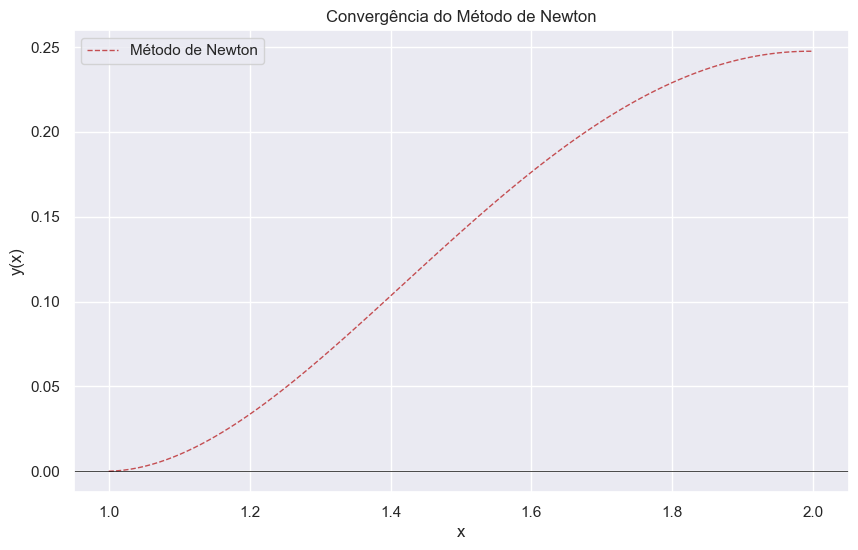

In [70]:
# Plotar o gráfico
sns.set(font_scale=1, font='sans serif')
plt.figure(figsize=(10, 6), facecolor="#FFF")

plt.plot(x_valor, raiz_aproximada, 'r--', label='Método de Newton', linewidth=1)
plt.axhline(0, color='black',linewidth=0.5)
plt.title('Convergência do Método de Newton')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.grid(True)
plt.show()